## Q&A Feature Selection

In [1]:
# What is a chi2 test used for?

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying

In [2]:
# Can chi-square be negative?

Since χ2 is the sum of a set of squared values, it can never be negative. The minimum chi squared value would be obtained if each Z = 0 so that χ2 would also be 0.

In [3]:
# What is information gain in machine learning?

Information gain is the reduction in entropy or surprise by transforming a dataset and is often used in training decision trees. Information gain is calculated by comparing the entropy of the dataset before and after a transformation.

In [1]:
# what is the difference between dimensionality reduction and feature selection

The difference is that feature selection select features to keep or remove from the dataset, 
whereas dimensionality reduction create a projection of the data resulting in entirely new input features

In [2]:
# how to choose best feature selection technique for a dataset?

<img src='feat_selection.jpg'>

#### Numerical Input, Numerical Output:

This is a regression problem, we can use correlation coefficients for feature selection
-Pearson’s correlation coefficient (linear).
-Spearman’s rank coefficient (nonlinear)

#### Numerical Input, Categorical Output:

    This is a classification problem with numerical input variables.
    Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

    ANOVA correlation coefficient (linear)
    Kendall’s rank coefficient (nonlinear)

    Kendall does assume that the categorical variable is ordinal.

#### Categorical Input, Numerical Output

    This is again a strange regression problem, we counter rarely. we can use methods used in regression probelms described previously, but in reverse manner

#### Categorical Input, Categorical Output

    This is a classification problem, The most common correlation measure for categorical data is the chi-squared test.
    Two methods are the most famous for this.
    - Chi-Squared test (contingency tables).
    - Mutual Information.

In [3]:
# What are some tips and tricks that can be used with feature selection?

    Transform Variables:
    Consider transforming the variables in order to access different statistical methods.

    For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out.
    You can also make a numerical variable discrete (e.g. bins); try categorical-based measures.

In [4]:
# What Is the Best Feature Selection Method?

    There is no best feature selection method.
    Just like there is no best set of input variables or best machine learning algorithm. At least not universally.

    Instead, you must discover what works best for your specific problem using careful systematic experimentation.
    Try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem

### Regression Feature Selection:

    Here, a test regression problem has been prepared using the make_regression() function.
    Feature selection has been performed using Pearson’s Correlation Coefficient via the f_regression() function.

In [5]:
from sklearn.datasets import make_regression

In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

In [7]:
# Generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)

In [8]:
# define feature selection
fs=SelectKBest(score_func=f_regression,k=10)

In [9]:
# apply feature selection
X_selected=fs.fit_transform(X,y)
print(X_selected.shape)

(100, 10)


#### Classification Feature Selection: (Numerical Input, Categorical Output)

In [10]:
from sklearn.datasets import make_classification

In [11]:
X,y=make_classification(n_samples=200,n_features=30,n_informative=3)

In [16]:
from sklearn.feature_selection import SelectKBest,f_classif

In [17]:
fs=SelectKBest(score_func=f_classif,k=2)

In [19]:
X_selected=fs.fit_transform(X,y)
print(X.shape)

(200, 30)


In [20]:
X_selected.shape

(200, 2)

### Precision and recall: trying to understand using Heart Disease data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import accuracy_score,classification_report,auc,roc_curve,roc_auc_score,precision_recall_curve

In [5]:
df=pd.read_csv('heart_v2.csv')
df.head(2)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0


In [11]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [13]:
df.columns=['age','sex','bp','cholestrol','target']

In [14]:
df.head(2)

,age,sex,bp,cholestrol,target
0,70,1,130,322,1
1,67,0,115,564,0


In [15]:
df['target'].value_counts()

0    150
1    120
Name: target, dtype: int64

In [16]:
df.isnull().sum()

age           0
sex           0
bp            0
cholestrol    0
target        0
dtype: int64

In [17]:
import warnings
warnings.filterwarnings('ignore')

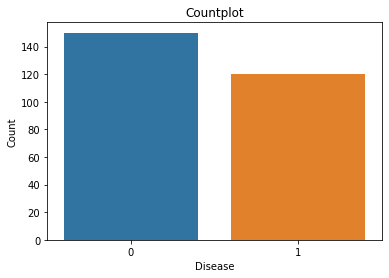

In [19]:
sns.countplot(df['target'])
plt.title('Countplot')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

In [20]:
df.dtypes

age           int64
sex           int64
bp            int64
cholestrol    int64
target        int64
dtype: object

In [22]:
X=df.drop(['target'],axis=1)
y=df['target']

In [23]:
type(X)

pandas.core.frame.DataFrame

In [24]:
type(y)

pandas.core.series.Series

In [25]:
df.head(2)

,age,sex,bp,cholestrol,target
0,70,1,130,322,1
1,67,0,115,564,0


In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
X=ss.fit_transform(X)

In [30]:
X[0:2]

array([[ 1.71209356,  0.6894997 , -0.07540984,  1.40221232],
       [ 1.38213977, -1.45032695, -0.91675934,  6.0930045 ]])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

In [32]:
# choosing best value of , based on test score

In [33]:
train_score=[]
test_score=[]
k_values=[]

In [35]:
for k in range(1,21):
    k_values.append(k)
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

In [36]:
max_test_score=max(test_score)
max_test_score

0.6911764705882353

In [41]:
df2=pd.DataFrame({'k_values':k_values,'test_score':test_score})

In [39]:
df2

,k_values,test_score
0,1,0.573529
1,2,0.676471
2,3,0.632353
3,4,0.691176
4,5,0.602941
5,6,0.632353
6,7,0.573529
7,8,0.602941
8,9,0.573529
9,10,0.544118


In [42]:
from sklearn.metrics import f1_score

    f1_score(y_test,y_pred)

    f1_score, also known as balanced F-score or F-measure.

    The F1 score can be interpreted as a weighted average of the precision and
    recall, where an F1 score reaches its best value at 1 and worst score at 0.
    The relative contribution of precision and recall to the F1 score are
    equal. The formula for the F1 score is::

    F1 = 2 * (precision * recall) / (precision + recall)

#### When and why do we need f1-score?

    When precision and recall both are equally important for us.
    since f1-score is the harmonic mean of precisin and recall
    
    High recall=high TPR
    HIGH Precision= high..??